In [89]:
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 'age',  'bmi',  'phist', 'smo_status',  'pkyr', 'Log_nodsize', 'spiculat', 'uplobe', 'Log_bmark'
# possible new: Gender, age_start, age_quit, nodule density, Reche.ng.ml, LNCYFRA, CYF*BV, CYF/TV

# 12049146729 Negative for Malignant Cells is the case need to be very careful

In [5]:
# convert to csv
df = pd.read_excel('/nfs/masi/MCL/file/clinical/LabelFile/0720MK/20200720_nopassword.xlsx', sheet_name = 'Main.Table')
df.to_csv('/nfs/masi/MCL/file/clinical/LabelFile/0720MK/20200720_nopassword_radi.csv', index = False)

In [45]:
# compare the difference
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0720MK/20200720_nopassword.csv')
print (len(df))
df = df.loc[df['Has.CYFRA.No.Exclusion']== 1]
print (len(df))
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0601MK/IPN_biomarker-MK_nopassword.xlsx')
print (len(df))
df = df.loc[df['CSI..CYFRA21.1..ng.mL.']== df['CSI..CYFRA21.1..ng.mL.']]
print (len(df))
print (sum(df['withimg0601']))

1199
545
950
868
656.0


In [70]:
# make a more complete spreadsheet
jasper_path = '/nfs/masi/MCL/file/clinical/LabelFile/0421/Report_part1_nodup.csv'
data_path = '/nfs/masi/MCL/file/clinical/LabelFile/0720MK/20200720_nopassword_radi.csv'
df = pd.read_csv(jasper_path)
pid_mclid = {}
for i, item in df.iterrows():
    if item['MCL_ID'] == item['MCL_ID'] and item['Patient ID'] == item['Patient ID']:
        pid = str(item['Patient ID']).replace('.0', '')
        mclid = str(item['MCL_ID']).replace('.0', '')
        pid_mclid[pid] = mclid
df = pd.read_csv(data_path)
more_MCLID = []
for i, item in df.iterrows():
    pid = str(item['Patient.ID']).replace('.0', '')
    if pid in pid_mclid.keys():
        more_MCLID.append(pid_mclid[pid])
    else:
        more_MCLID.append('')
df['more_MCLID'] = more_MCLID
df.to_csv(data_path, index = False)

In [71]:
# as in MK0601, other is cancer
# Cancer: Adenocarcinoma, 'Carcinoid', 'Large Cell Carcinoma', 'NSCLC', 'Small Cell Carcinoma','Squamous Cell Carcinoma', 'Other' 
# non-cancer: 'Negative for Malignant Cells', , 
data_path = '/nfs/masi/MCL/file/clinical/LabelFile/0720MK/20200720_nopassword_radi.csv'
df = pd.read_csv(data_path)
gt_reg = []
cancer_set = {'Adenocarcinoma', 'Carcinoid', 'Large Cell Carcinoma', 'NSCLC', 'Small Cell Carcinoma','Squamous Cell Carcinoma', 'Other'}
nocancer_set = {'Negative for Malignant Cells'}
for i, item in df.iterrows():
    if item['Hist.Simplified'] != item['Hist.Simplified']:
        gt_reg.append('')
    elif item['Hist.Simplified'] in cancer_set:
        gt_reg.append(1)
    elif item['Hist.Simplified'] in nocancer_set:
        gt_reg.append(0)
df['gt_reg'] = gt_reg
df.to_csv(data_path, index = False)


In [23]:
# make sure the "1Cancer0Bengin" consistent with 'Hist.Simplified'
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0601MK/IPN_biomarker-MK_nopassword.xlsx')
cancer_set = {'Adenocarcinoma', 'Carcinoid', 'Large Cell Carcinoma', 'NSCLC', 'Small Cell Carcinoma','Squamous Cell Carcinoma', 'Other'}
nocancer_set = {'Negative for Malignant Cells'}
#print (df.keys())
for i, item in df.iterrows():
    if item['1Cancer0Benign'] == 1:
        if item['Hist.Simplified'] not in cancer_set:
            print (item['MCL_ID'], item['Hist.Simplified'])
#     if item['1Cancer0Benign'] == 0:
#         if item['Hist.Simplified'] not in nocancer_set:
#             print (item['Hist.Simplified'])


12049146729 Negative for Malignant Cells


In [72]:

data_path = '/nfs/masi/MCL/file/clinical/LabelFile/0720MK/20200720_nopassword_radi.csv'
df = pd.read_csv(data_path)
new_MCLID = []
for i, item in df.iterrows():
    oriID = str(item['MCL.ID']).replace('.0', '')
    moreID = str(item['more_MCLID']).replace('.0', '')
    if len(moreID) > 8 and len(oriID) > 8:
        if moreID == oriID:
            new_MCLID.append(oriID)
        else:
            new_MCLID.append(item['Patient.ID'])
    elif len(moreID) > 8:
        new_MCLID.append(moreID)
    elif len(oriID) > 8:
        new_MCLID.append(oriID)
    else:
        new_MCLID.append(item['Patient.ID'])
df['MCL_ID'] = new_MCLID
df.to_csv(data_path, index = False)
        

In [73]:
# add column with subj with good image

data_root = '/nfs/masi/MCL/nifti/combine'

subj_list = os.listdir(data_root)
data_path = '/nfs/masi/MCL/file/clinical/LabelFile/0720MK/20200720_nopassword_radi.csv'
df = pd.read_csv(data_path)

subjwithimg0802 = []

for i, item in df.iterrows():
    mclid = str(item['MCL_ID']).replace('.0', '')
    if mclid in subj_list:
        subjwithimg0802.append(1)
    else:
        subjwithimg0802.append(0)
df['subjwithimg0802'] = subjwithimg0802
df.to_csv(data_path)


In [57]:
# tmp
data_path = '/nfs/masi/MCL/file/clinical/LabelFile/0720MK/20200720_nopassword.csv'

df = pd.read_csv(data_path)
df = df.loc[df['CSI..CYFRA21.1..ng.mL.']== df['CSI..CYFRA21.1..ng.mL.']]
sum(df['subjwithimg0802']), len(df)

(657, 993)

In [74]:
# get CT.Date sess

data_path = '/nfs/masi/MCL/file/clinical/LabelFile/0720MK/20200720_nopassword_radi.csv'

df = pd.read_csv(data_path)

sess = []
for i, item in df.iterrows():
    if item['MCL_ID'] != item['MCL_ID']:
        sess.append('')
    else:
        subj = str(item['MCL_ID']).replace('.0','')
        ctdatestr = str(item['CT.Date']).replace('-', '').split(' ')[0]
        if len(ctdatestr) != 8:
            sess.append('')
        else:
            sess.append(subj + 'time' + ctdatestr)
df['CTDatesess'] = sess
df.to_csv(data_path, index = False)

In [75]:
# get lastscan (in featnpy) sess

data_path = '/nfs/masi/MCL/file/clinical/LabelFile/0720MK/20200720_nopassword_radi.csv'
feat_root = '/nfs/masi/gaor2/data/MCL/clinical_mcl/featnpy128'

feat_list = os.listdir(feat_root)

subj_item = {}
for i in range(len(feat_list)):
    subj = feat_list[i].split('t')[0]
    if subj not in subj_item.keys():
        subj_item[subj] = []
    subj_item[subj].append(feat_list[i].replace('.npy', ''))

df = pd.read_csv(data_path)

sess = []
for i, item in df.iterrows():
    if item['MCL_ID'] != item['MCL_ID']:
        sess.append('')
    else:
        subj = str(item['MCL_ID']).replace('.0','')
        if subj in subj_item.keys():
            sess.append(max(subj_item[subj]))
        else:
            sess.append('')
df['featlastSess'] = sess
df.to_csv(data_path, index = False)

In [76]:
# get used sess 0803

data_path = '/nfs/masi/MCL/file/clinical/LabelFile/0720MK/20200720_nopassword_radi.csv'
df = pd.read_csv(data_path)
feat_root = '/nfs/masi/gaor2/data/MCL/clinical_mcl/featnpy128'

feat_list = os.listdir(feat_root)
feat_list = [i.replace('.npy', '') for i in feat_list]

usedsess = []

for i, item in df.iterrows():
    if item['CTDatesess'] in feat_list:
        usedsess.append(item['CTDatesess'])
    elif item['featlastSess'] in feat_list:
        usedsess.append(item['featlastSess'])
    else:
        subj = str(item['MCL_ID']).replace('.0','')
        usedsess.append(subj + 'timedefault')
df['usedsess'] = usedsess
df.to_csv(data_path, index = False)

/home/local/VANDERBILT/gaor2/anaconda3/envs/python37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,2,4,5,33,36,37,38,39,40,43,44,45,46,47,48,49,50,54,55,56,57,63,72,74,75,76,78,79,82,85,88,89,90,91,94,95,102,103,104,105,106,107,108,110,111,112,508,510) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [78]:
# add kaggle 

df = pd.read_csv('/nfs/masi/gaor2/data/MCL/clinical_mcl/MCL20200803.csv')
sess_risk = {}
for i, item in df.iterrows():
    sess_risk[item['id']] = item['cancer']

data_path = '/nfs/masi/MCL/file/clinical/LabelFile/0720MK/20200720_nopassword_radi.csv'
df = pd.read_csv(data_path)
kaggle_cancer = []
for i, item in df.iterrows():
    if item['usedsess'] in sess_risk.keys():
        kaggle_cancer.append(sess_risk[item['usedsess']])
    else:
        kaggle_cancer.append('')
df['used_kaggle'] = kaggle_cancer
df.to_csv(data_path, index = False)

In [79]:
# add phase, with exist

phase_dict = {}
df = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/mcl/ThreeSet_norm0612.csv')
for i, item in df.iterrows():
    pid = str(item['subject']).replace('.0', '')
    phase_dict[pid] = item['phase']
        

data_path = '/nfs/masi/MCL/file/clinical/LabelFile/0720MK/20200720_nopassword_radi.csv'
df = pd.read_csv(data_path)
proj_list = list(set(df['MCL_ID'].tolist()))
proj_list = [str(i).replace('.0', '') for i in proj_list]
print (len(proj_list))
pid_phase = {} 

for i in range(len(proj_list)):
    if proj_list[i] in phase_dict.keys():
        pid_phase[proj_list[i]] = phase_dict[proj_list[i]]
    else:
        pid_phase[proj_list[i]] = i % 5 

phase_list = [] 
for i, item in df.iterrows(): 
    pid = str(item['MCL_ID']).replace('.0', '')
    phase_list.append(pid_phase[pid])
df['phase'] = phase_list 

df.to_csv(data_path, index = False)

1199


# Normalize items 

In [83]:
# normalize, adapted from compare/clinical_spore/mcl_data.ipynb

data_path = '/nfs/masi/gaor2/data/Cotrain/MissClinic/mcl/20200720_nopassword.csv'
df = pd.read_csv(data_path)
print (set(df['Race']))
def get_race(x):
        if x == 'White' or x == 'Caucasian':
            return 1
        if x == 'African American':
            return 2
        if x == 'Asian':
            return 3
        if x == 'Native Hawaiian or Other Pacific Islander':
            return 5
        if x == 'Hispanic/ Latnio':
            return 2.5
        if x == 'Native American':
            return 4
        if x in ['Unknown/Other', 'Unknown']:
            return ''
race = []
for i, item in df.iterrows():
    if item['Race'] != item['Race']:
        race.append('')
    else:
        race.append(get_race(item['Race']))
df['racenum'] = race
df.to_csv(data_path, index = False)

{nan, 'White', 'Native Hawaiian or Other Pacific Islander', 'Native American', 'Unknown/Other', 'Unknown', 'Caucasian', 'African American', 'Asian'}


In [85]:
data_path = '/nfs/masi/gaor2/data/Cotrain/MissClinic/mcl/20200720_nopassword.csv'
df = pd.read_csv(data_path)
quit_time = []
norm_smo = []
print (set(df['Smoking.Status']))
for i, item in df.iterrows():
    if item['Smoking.Status'] != item['Smoking.Status']:
        if item['Age.Started.Smoking'] != item['Age.Started.Smoking'] and item['Age.Quit.Smoking'] != item['Age.Quit.Smoking']:
            # never smoker
            norm_smo.append(1)
            quit_time.append(40)
        elif item['Age.Quit.Smoking'] == item['Age.Quit.Smoking']:
            # former smoker
            norm_smo.append(1)
            quit_time.append(item['Age'] - item['Age.Quit.Smoking'])
        else:
            # current smoker
            norm_smo.append(2)
            quit_time.append(0)
    else:
        if 'urrent' in item['Smoking.Status']:
            norm_smo.append(2)
            quit_time.append(0)
        elif 'ever' in item['Smoking.Status']: # means never
            norm_smo.append(1)
            quit_time.append(40)
        elif item['Age.Quit.Smoking'] == item['Age.Quit.Smoking']:
            norm_smo.append(1)
            quit_time.append(item['Age'] - item['Age.Quit.Smoking'])
        else:
            norm_smo.append(1)
            quit_time.append('')

df['norm_smo'] = norm_smo
df['quit_time'] = quit_time
df.to_csv(data_path, index = False)

{nan, 'ex-smoker quit at least 12 months ago', 'Never', 'Ex-smoker', 'Current smoker', 'M', 'Former smoker', 'current smoker', 'Never smoker', 'P', 'Current/Ex-smoker', 'never smoker'}


In [107]:
data_path = '/nfs/masi/gaor2/data/Cotrain/MissClinic/mcl/20200720_nopassword.csv'

df = pd.read_csv(data_path)
norm_age, norm_edu, norm_bmi, norm_quit, norm_race, norm_pkyr = [], [], [], [], [], []
norm_smo = []

for i, item in df.iterrows():
    if item['Age'] == item['Age']:
        quit = min(90, max(40, item['quit_time']))
        norm_age.append((item['Age'] - 54) / (80 - 54) + 0.01) 
    else:
        norm_age.append('')
        
        
    if item['BMI'] == item['BMI'] and item['BMI'] not in ['M', 'F']:
        
        bmi = min(60, max(20, float(item['BMI']) )) 
        norm_bmi.append((bmi - 20) / (60 - 20) + 0.01)
    else:
        norm_bmi.append('')
        
    if item['quit_time'] == item['quit_time']:
        quit = min(40, max(0, item['quit_time']))
        norm_quit.append((quit - 0) / 30 + 0.01)
    else:
        norm_quit.append('')
        
    if item['PKY'] == item['PKY']:
        pkyr = min(200, max(0, item['PKY']))
        norm_pkyr.append( pkyr / 200 + 0.01)
    else:
        norm_pkyr.append('')

    
    if item['racenum'] == item['racenum']:
        race = item['racenum']
        if race == 4:
            race = 3
        if race == 5:
            race = 2.5
        if race >= 6:
            race = 1.5
        norm_race.append((race - 1) / 2 + 0.01)
    else:
        norm_race.append('')
        
    if item['norm_smo'] == item['norm_smo']:
        norm_smo.append( item['norm_smo'] / 2 + 0.01)
    else:
        norm_smo.append('')
        
df['age'] = norm_age
#df['education'] = norm_edu
df['bmi'] = norm_bmi
df['quit_time'] = norm_quit
df['pkyr'] = norm_pkyr
df['race'] = norm_race
df['smo_status'] = norm_smo
df.to_csv(data_path.replace('.csv', '_norm.csv'), index = False)

In [111]:
# normalize nodule, bloodmark, with log

data_path = '/nfs/masi/gaor2/data/Cotrain/MissClinic/mcl/20200720_nopassword_norm.csv'

df = pd.read_csv(data_path)
Log_nodsize, Log_bmark = [], []
for i, item in df.iterrows():
    
    if item['Nodule.Size.MM'] == item['Nodule.Size.MM']:
        log_nsize = min(5, max(1, np.log(float(item['Nodule.Size.MM'])))) 
        Log_nodsize.append( (log_nsize - 1) / 4 + 0.01)
    else:
        Log_nodsize.append('')
    
    if item['CSI..CYFRA21.1..ng.mL.'] == item['CSI..CYFRA21.1..ng.mL.']:
        log_bmark = min(4, max(-4, np.log(item['CSI..CYFRA21.1..ng.mL.']))) 
        Log_bmark.append((log_bmark + 4) / (4 + 4) + 0.01)
    else:
        Log_bmark.append('')
        
df['Log_bmark'] = Log_bmark
df['Log_nodsize'] = Log_nodsize
df.to_csv(data_path, index = False)

In [109]:
df['Nodule.Size.MM']

0         25
1         18
2          9
3          8
4         14
        ... 
1194     8.7
1195    26.5
1196    10.9
1197    12.5
1198     NaN
Name: Nodule.Size.MM, Length: 1199, dtype: object

1077
1047
0.4711526138420129 1.0059016554270799 0.01


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text yticklabel objects>)

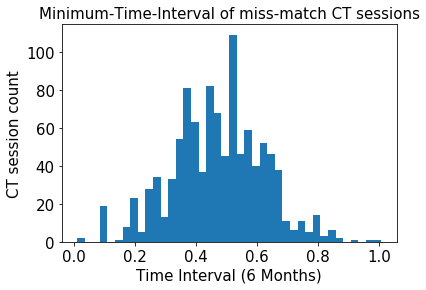

In [103]:
import numpy as np

data_path = '/nfs/masi/gaor2/data/Cotrain/MissClinic/mcl/20200720_nopassword_norm.csv'
df = pd.read_csv(data_path)

factor = 'Log_nodsize'

print (len(df))
df = df.loc[df[factor] == df[factor]]

print (len(df))
factor_list = df[factor].tolist()
factor_list = [float(i) for i in factor_list if i not in ['Not Reported ', 'Not Reported']]

print (np.mean(factor_list), np.max(factor_list), np.min(factor_list))

plt.hist(factor_list,  bins=40)  # `density=False` would make counts
#plt.xticks(range(70))
plt.title('Minimum-Time-Interval of miss-match CT sessions', fontsize =15 )
plt.ylabel('CT session count', fontsize =15)
plt.xlabel('Time Interval (6 Months)', fontsize =15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

In [106]:
# spiclu, uplob, nodulesize, age, bmi, quit_time, packyear, race, 

# Mean Imputation some items

In [121]:
df = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/mcl/20200720_nopassword_norm.csv')

# df = df.loc[df['subjwithimg0802']== 1]

# df = df.query('Mayo_risk == Mayo_risk')
# print (len(df))
# df = df.query('Log_bmark == Log_bmark')
# print (len(df))
# print (np.mean(df['Log_bmark'].tolist()))

# pkyr mean: 0.25
# bmi mean: 0.207
# Log_bmark mean: 0.508

pkyr_mImput, bmi_mImput, Log_bmark_mImput = [], [], []

for i, item in df.iterrows():
    if item['pkyr'] != item['pkyr']:
        pkyr_mImput.append(0.25)
    else:
        pkyr_mImput.append(item['pkyr'])
    
    if item['bmi'] != item['bmi']:
        bmi_mImput.append(0.207)
    else:
        bmi_mImput.append(item['bmi'])
        
    if item['Log_bmark'] != item['Log_bmark']:
        Log_bmark_mImput.append(0.508)
    else:
        Log_bmark_mImput.append(item['Log_bmark'])
df['pkyr_mImput'] = pkyr_mImput
df['bmi_mImput'] = bmi_mImput
df['Log_bmark_mImput'] = Log_bmark_mImput
df.to_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/mcl/20200720_nopassword_norm.csv', index = False)


In [127]:
# temp cell
df = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/clinical_spore/mcl/20200720_nopassword_norm.csv')
print (len(df))
df = df.loc[df['subjwithimg0802']== 1]

df = df.query('Mayo_risk == Mayo_risk')

df = df.query('Cohort == 4')
print (len(df))

1199
116


In [128]:
df['Cohort']

1081    4.0
1082    4.0
1083    4.0
1084    4.0
1085    4.0
       ... 
1194    4.0
1195    4.0
1196    4.0
1197    4.0
1198    4.0
Name: Cohort, Length: 116, dtype: float64